# Uygulama Notları: 8
## FİZ220 - Bilgisayar Programlama II | 14/05/2020

**Lineer Cebir**

* Giriş
* Hafıza-i beşer, nisyan ile mâlûldür... (feilün mefaülü mefalülü... 8P) ya da "...previously on FİZ220..."
* Matematik de bir yere kadar
* Sorunlar, sorunsallar...
* Özdeğer ve özvektörlerin kısa yoldan bulunması
* Tavsiyeler

Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

## Giriş
6\. dersimizin olan "[Matris Uygulamaları](https://emresururi.github.io/FIZ220/FIZ220_EST_UygulamaNotlari_06_Matris_Uygulamalari.html)"nda lineer cebiri _n_ bilinmeyenli _n_ denklemi çözmek için kullanmıştık, bu ders bu konuyu biraz daha geliştirip, bir matris işleminin sonuçlarını ve özelliklerini görüp, yorumlayacağız. 

## _Hafıza-i beşer, nisyan ile mâlûldür..._ (feilün mefaülü mefalülü... 8P) ya da _"...previously on FİZ220..."_
Birbirimizi kandırmadan, kısa bir hatırlatma yapalım (ne de olsa araya matrissiz, *for*'lu, *if*'li, *while*'lı döngülü kararlı bir ders girdi): $n\times n$'lik matrisle, _n_ bilinmeyenli _n_ denklem arasındaki yakın ve samimi bağ hakkında. Örneğin, iki bilinmeyenli iki denklemimiz olsun:

$$3x+2y = 7\\x-y=-1$$

Bunu matris çarpımı şeklinde yazabiliriz, yazalım hatta:

$$\begin{bmatrix}3&2\\1&-1\end{bmatrix}_{(2\times 2)}\cdot\left( \begin{matrix}x\\y\end{matrix} \right)_{(2\times 1)}= \left(\begin{matrix}7\\-1\end{matrix}\right)_{(2\times 1)}$$

Yani aslında yaptığımız şey, şu çarpma işlemindeki $x$'i çözmekten ibaret:

$$A\cdot\vec{x} = \vec{b}$$

Skaler çarpım olsa, $b$'yi $A$'ya böler, muradımıza ererdik ama matrislerde bildiğimiz anlamda bir bölme yok. Biraz felsefi takılırsak, aslında $b$'yi $A$'ya bölmüyoruz, eşitliğin iki yanını da $A$nın çarpma işlemine göre ters elemanı ile çarpıyoruz -- skaler çarpımda bu işlemin tersi bölmeye denk geliyor, matrislerin çarpımında ise matrisin tersi ile çarpmaya, özetle, şöyle bir şey yaptığımız:

$$A^{-1}\cdot A\cdot\vec{x} = A^{-1}\cdot \vec{b}$$

Yönler önemli, işlem sırası değil. $A^{-1}\cdot A$ işlemini sıralamada öne alıp yaptığımızda, birim elemana dönüşüp eşitliğin sol yanında $\vec{x}$'i yalnız bırakıyoruz, sağ taraf da bildiğimiz bir matris çarpımı, gayet kolay.

Örneğimize dönersek, bu örneği iki farklı şekilde çözmüştük (biri diğerinin kestirmesiydi aslında). İlk olarak sağ tarafı, yukarı yazdığımız şekilde yazıp, $A$'nın tersi ile $b$'yi çarpımıştık:


In [2]:
import numpy as np
A = np.array([[3,2],[1,-1]])
b = np.array([[7],[-1]])
A_inv = np.linalg.inv(A)

print(np.dot(A_inv,b))

[[1.]
 [2.]]


(eşitliğin sol tarafında $\vec{x}$, yani $\left( \begin{matrix}x\\y\end{matrix} \right)$ olduğundan, birebir eşleşmeyle, $x$'in 1, $y$'nin 2 olduğunu hemen anlıyoruz.

Diğer yöntem ise olayın arka planını, formülasyonu vs. atlayıp, sonuca odaklanmamızı sağlıyordu. Basitçe "çöz" (*solve*) deyip, keyfimize bakıyorduk:

In [2]:
print(np.linalg.solve(A,b))

[[1.]
 [2.]]


Aynı 6. dersin sonrasında, bu sefer dönüş operatörünü gördük, nasıl bir şeydi? Şu şekil bir şeydi ($\theta$ pozitif yönde, yani saat-yönünün tersine dönüşü işaret ediyor, aman dikkat!):

$$R_{\theta}=\begin{bmatrix}\cos{\theta}&-\sin{\theta}\\\sin{\theta}&\cos{\theta}\end{bmatrix}$$

Bu dönüş matrisini kullanarak, iki boyutta istediğimiz herhangi bir $\left( \begin{matrix}x_0\\y_0\end{matrix} \right)$ noktasını istediğimiz $\theta$ açısıyla çevirebiliyorduk, örneğin:

In [4]:
theta = np.pi / 6
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
p = np.array([[3.2],[1.7]])
p_ussu =np.dot(R,p)
print(p_ussu)

[[1.92128129]
 [3.07224319]]


Bakalım gerçekten 30 derece (nam-ı diğer: $\pi/6$) döndürmüş mü? Nasıl anlarız?.. önce bir çizdirip bakalım (biraz yeni bir şeyler, çokça da kafamızı kullanıyoruz), sonra daha güzel bir şey yapalım:

3.6235341863986883
[0.48833395] [1.01193273]
[30.]


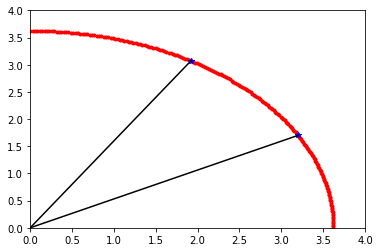

In [7]:
import matplotlib.pyplot as plt

noktalar = np.empty((0,2))
noktalar = np.append(noktalar,p.T,axis=0)
noktalar = np.append(noktalar,p_ussu.T,axis=0)

plt.xlim([0,4])
plt.ylim([0,4])
plt.plot(noktalar[:,0],noktalar[:,1],"*")

# noktalarin merkeze uzakligini hesaplayalim
r = np.linalg.norm(p)
print(r)

yay = np.empty((0,2))
theta1 = np.arctan(p[1]/p[0])
theta2 = np.arctan(p_ussu[1]/p_ussu[0])
print (theta1,theta2)
print(np.rad2deg(theta2-theta1))

#for theta_0 in np.linspace(theta1,theta2,100):
for theta_0 in np.linspace(0,np.pi/2,200):
    #print(theta_0,r*np.cos(theta_0),r*np.sin(theta_0))
    plt.plot(r*np.cos(theta_0),r*np.sin(theta_0),".r")
#print(noktalar)

plt.plot(noktalar[:,0],noktalar[:,1],"*b")
plt.plot([0,noktalar[0,0]],[0,noktalar[0,1]],"k-")
plt.plot([0,noktalar[1,0]],[0,noktalar[1,1]],"k-")
plt.show()

Gayet 30 derece gibi görünüyor, ama siz bilirsiniz. (İşte tam da aynı nedenden dolayı, bilimde genel olarak çizimleri değil de, sayısal değerleri baz alıyoruz). Sayısal değerlerin uğrak mekanı da lineer cebir. Örneğin $\vec{a}$ ile $\vec{b}$ vektörleri arasındaki açıyı hesaplamanızı istesem, aklınıza hemen skaler çarpımın formülü gelir (geliyor, değil mi?), ne de olsa:

$$\vec{a}\cdot\vec{b} = |\vec{a}|\,|\vec{b}|\,\cos(\theta)$$

buradan $\theta$'yı çekersek:

$$\theta = \arccos\left(\frac{\vec{a}\cdot\vec{b}}{|\vec{a}|\,|\vec{b}|}\right)$$

hemen örneğimizde uygulayalım bunu:

In [5]:
boy_p = np.linalg.norm(p)
boy_p_ussu = np.linalg.norm(p_ussu)
# (ikisi ayni boydalar tabii ki de! 8)

aci = np.arccos(np.dot(p.T,p_ussu)/(boy_p*boy_p_ussu))
# vektorlerimiz (2x1) boyutlarinda olduklarindan, 
# carpabilmek icin ilkini (1x2) haline getiriyoruz:
# -> (1x2)*(2x1)
print(np.rad2deg(aci))

[[30.]]


## Matematik de bir yere kadar
Peki sizce niye durup dururken bunları ("*n* bilinmeyenli *n* denklemin çözümü" ile "bir noktayı döndürmek") tekrardan hatırladık? İkisi de kendince güzel konular ama sonuçta tekrar ediyorsak bir sebebi olmalı. Soruya soruyla karşılık verirsek:

_Denklemleri çözmek için katsayılar matrisinin tersi ile sonuç vektörünü çarpmakla, dönüş matrisini döndürmek istediğimiz noktaya vurdurmak arasında matematiksel olarak bir fark var mı?_

(burada "matematiksel olarak" deyimini "bilgisayar açısından" diye okuyun)

[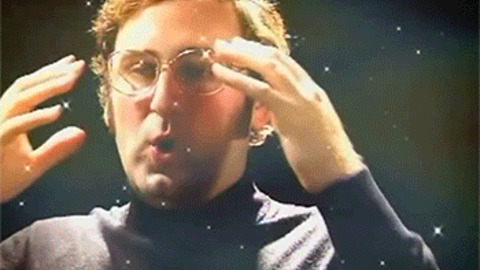](https://www.youtube.com/watch?v=9CS7j5I6aOc)
Mindblown!

Bizim matrisleri ne amaçla çarptırdığımızın önemi bizde saklı - bilgisayara göre _hepsi aynı_ - bir matrisle, bir vektörü çarptırmak. Şu halde, en karmaşık denklemi bile bir noktayı döndürmek olarak düşünebilir, yorumlayabiliriz (birazdan bu tanıma bir küçük ekleme daha yapacağım), nasıl yaklaşırsak yaklaşalım, hepsi aynı kapıya çıkıyor zira.

Peki hazır döndürmeyle ilgilenmekteyken, bir de boy değiştirmece özelliğini eklemeye çalışalım. Mesela, (1,1) noktasında bir noktamız olsun: bunun merkeze uzaklığının $\sqrt{1^2 + 1^2} = \sqrt{2}$ olduğunu, *x*-ekseni ile yaptığı açının da $45^o$ olduğunu hemen söyleyebiliriz. Bu noktanın yerini $\vec{d}$ pozisyon vektörü ile gösterecek olursak kolayca: $\vec{d} = \hat{\imath} + \hat{\jmath}$ olduğunu da biliriz. Vektörümüzü lineer cebir notasyonunda yazalım:

$$\vec{d} = \left( \begin{matrix}1\\1\end{matrix} \right)$$

Bileşenlerin boyunu iki katına çıkartırsak, o zaman da şöyle bir şey olur:

$$\vec{d'} = \left( \begin{matrix}2\\2\end{matrix} \right)$$

$(2\times1)$lik $\vec{d}$ vektörünü neyle çarpabiliriz ki bize $\vec{d'}$yi versin? Sonucun da $(2\times1)$ boyunda bir vektör olduğunu bildiğimize göre, çarpan şeyin boyutunun $(2\times2)$lik bir matris olması şart. Hazırsanız cevabı yazıyorum:

$$\begin{bmatrix}2&0\\0&2\end{bmatrix}_{(2\times 2)}\cdot\left( \begin{matrix}1\\1\end{matrix} \right)_{(2\times 1)}= \left(\begin{matrix}2\\2\end{matrix}\right)_{(2\times 1)}$$

Rica ediyorum, şöyle bir arkanıza yaslanın, kafanızdan yukarıdaki çarpma işlemini yapın, çalıştığından emin olun. (1,1) noktası belki de çok basitti, hem simetrik, tam anlaşılmıyor. O yüzden gelin bir de (7,11) noktasına uygulayalım:

$$\begin{bmatrix}2&0\\0&2\end{bmatrix}_{(2\times 2)}\cdot\left( \begin{matrix}7\\11\end{matrix} \right)_{(2\times 1)}= \left(\begin{matrix}14\\22\end{matrix}\right)_{(2\times 1)}$$

siz işlemi yine kafanızdan teyit ededurun, biz de kompütere soralım arada:

[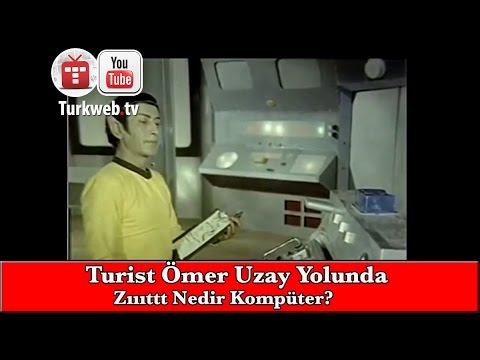](https://www.youtube.com/watch?v=CtdgC4AfWyo)
_Mr. Spak Kabakulak!_ / Turist Ömer Uzay Yolunda (1973 -- Star Trek'in ilk filminin 1979 yılında çekildiğine dikkatinizi çekerim! 8) [dizi: 1966-1969]

In [6]:
M2 = np.array([[2,0],[0,2]])
d  = np.array([[1],[1]])

print(np.dot(M2,d))
print("-"*45)
p = np.array([[7],[11]])
print(np.dot(M2,p))

[[2]
 [2]]
---------------------------------------------
[[14]
 [22]]


Doğru yani sonuçta, boy uzatma/kısaltma operatörü birim matrisinin istenen oranla çarpılması sonucunda oranın köşegenlere yerleştiği şekil.

Peki o halde şuna da cevap verelim bakalım: önce $\theta$ kadar döndürüp, sonra boyunu $k$ katına nasıl çıkarırız? 

Cevap zaten soruda saklı: önce *$\theta$ kadar döndürün*, sonra *boyunu $k$ katına çıkarın* ;)

$$\left( \begin{matrix}x_0'\\y_0'\end{matrix} \right)=\begin{bmatrix}k&0\\0&k\end{bmatrix}\begin{bmatrix}\cos{\theta}&-\sin{\theta}\\\sin{\theta}&\cos{\theta}\end{bmatrix}\left( \begin{matrix}x_0\\y_0\end{matrix} \right)$$

Yukarıda da bahsettiğimiz üzere, yönler/yerler önemli, işlem sırası değil, o zaman yerleri değiştirmeden iki matrisi çarpalım:

$$\left( \begin{matrix}x_0'\\y_0'\end{matrix} \right)=\begin{bmatrix}k\cos\theta &-k\sin\theta\\k\sin\theta&k\cos\theta\end{bmatrix}\left( \begin{matrix}x_0\\y_0\end{matrix} \right)$$

Bir vektörü döndürdüğünüzde, boyu değişmez, bunu da dönüş operatörünün determinantının 1 olmasından anlıyoruz: $\cos^2\theta - (-sin^2\theta) = \cos^2\theta+\sin^2\theta = 1$.

O zaman elimizde bir başlangıç vektörü, bir de bitiş vektörü varsa, bu iki vektörü kullanarak, vektörün ne kadar döndürüldüğünü de, boyunun ne kadar değiştiğini de anlayabiliriz. Çünkü, iki boyut özelinde konuşursak, bileşke operatörümüzün $(2\times2)$'lik bir matris olduğunu biliyoruz, dahası köşegendeki değerleri birbirine, köşegen dışı değerler de birbirinin eksilisine eşit. Örnek üzerinden gidelim:

*Ayşe'nin merkezden (2,3) noktasına uzanan bir vektörü var, bir gün ona şaka yapmak isteyen Betül, Ayşe dışarıdayken, Ayşe'nin vektörünü $\theta$ kadar döndürüp, $k$ kadar da boyunu değiştiriyor. Ayşe eve geldiğinde vektörünün bu yeni durumda merkezden (-2.69856,0.17404) noktasına uzandığını görüyorsa, Betül vektörü kaç derecelik açıyla döndürüp, boyunu ne kadar değiştirmiştir?*

Önce ölçeklendirme katsayısı $k$'yı hesaplayalım: Bir vektörü ne kadar döndürürseniz döndürün, boyu değişmez. O halde başlangıçtaki ve sondaki vektörlerin boyunun oranı bize doğrudan $k$'yı verecek:

In [7]:
v1 = np.array([[2],[3]])
v2 = np.array([[-2.69856],[0.17404]])

v1_boy = np.linalg.norm(v1)
v2_boy = np.linalg.norm(v2)
print("v1'in boyu :",v1_boy)
print("v2'nin boyu:",v2_boy)
print("boylarin orani: k=|v2|/|v1|:",v2_boy/v1_boy)

v1'in boyu : 3.605551275463989
v2'nin boyu: 2.704166414109901
boylarin orani: k=|v2|/|v1|: 0.7500008202662182


Gördük ki, %75 oranında bir kısalma söz konusu, yani ölçek operatörü:

$$\begin{bmatrix}0.75&0\\0&0.75\end{bmatrix}$$

şeklinde, işlem zincirimiz ise an itibarı ile:

$$\left( \begin{matrix}-2.69856\\0.17404\end{matrix} \right)=\begin{bmatrix}0.75&0\\0&0.75\end{bmatrix}\begin{bmatrix}\cos\theta &-\sin\theta\\\sin\theta&\cos\theta\end{bmatrix}\left( \begin{matrix}2\\3\end{matrix} \right)$$

durumunda.

Şimdi sıra, kaç derecelik açıyla döndürdüğüne geldi. Bunun için eşitliğin iki yanını soldan, ölçek operatörümüzün tersi ile çarpacağız. Bu durumda sol taraf:

$$\begin{bmatrix}0.75&0\\0&0.75\end{bmatrix}^{-1}\,\left( \begin{matrix}-2.69856\\0.17404\end{matrix} \right)$$

sağ taraf ise:
$$\underbrace{\begin{bmatrix}0.75&0\\0&0.75\end{bmatrix}^{-1}\,\begin{bmatrix}0.75&0\\0&0.75\end{bmatrix}}_{\mathbb{1}}\begin{bmatrix}\cos\theta &-\sin\theta\\\sin\theta&\cos\theta\end{bmatrix}\left( \begin{matrix}2\\3\end{matrix} \right)=\begin{bmatrix}\cos\theta &-\sin\theta\\\sin\theta&\cos\theta\end{bmatrix}\left( \begin{matrix}2\\3\end{matrix} \right)$$

olacak.

Sol tarafı hesaplattıralım bakalım:

In [8]:
K = 0.75*np.eye(2,2)
print(K)
print("-"*45)

K_ters = np.linalg.inv(K)
print(K_ters)
print("-"*45)

K_ters_x_v2 = np.dot(K_ters,v2)
print(K_ters_x_v2)

[[0.75 0.  ]
 [0.   0.75]]
---------------------------------------------
[[1.33333333 0.        ]
 [0.         1.33333333]]
---------------------------------------------
[[-3.59808   ]
 [ 0.23205333]]


Sağ tarafın çarpma işlemini yaparsak:

$$\begin{bmatrix}\cos\theta &-\sin\theta\\\sin\theta&\cos\theta\end{bmatrix}\left( \begin{matrix}2\\3\end{matrix} \right) = \left( \begin{matrix}2\cos\theta-3\sin\theta\\2\sin\theta+3\cos\theta\end{matrix} \right)$$

bunu da $\cos\theta$ ve $\sin\theta$ terimleri cinsinden yazarsak:

$$\left( \begin{matrix}2\cos\theta-3\sin\theta\\2\sin\theta+3\cos\theta\end{matrix} \right)=\begin{bmatrix}2&-3\\3&2\end{bmatrix}\left( \begin{matrix}\cos\theta\\\sin\theta\end{matrix} \right) $$

(herkes görebildi mi?)

İki tarafı birbirine eşitlediğimizde ise:

$$\left( \begin{matrix}-3.59808 \\0.23205333 \end{matrix} \right) =\begin{bmatrix}2&-3\\3&2\end{bmatrix}\left( \begin{matrix}\cos\theta\\\sin\theta\end{matrix} \right)$$

e kaldı ki, bu tam da en başta yaptığımız iki bilinmeyenli iki denklemin çözümü. Hemen çözelim o zaman (buradaki bilinmeyenlerimiz $\cos\theta$ ve $\sin\theta$):

In [9]:
A = np.array([[2,-3],[3,2]])
b = np.array([[-3.59808],[0.23205333]])

[[cost],[sint]] = np.linalg.solve(A,b)
print("cos(t):",cost,"\nsin(t):",sint)

theta_c = np.rad2deg(np.arccos(cost))
print(theta_c)

theta_s = np.rad2deg(np.arcsin(sint))
print(theta_s)

cos(t): -0.5000000007692308 
sin(t): 0.8660266661538462
120.0000000508919
60.00014465719476


Kosinüsü $-1/2$, sinüsü ise $\frac{\sqrt{3}}{2} = 0.86603$ olan bir açı arıyoruz. İlkini 120 ile 210 dereceler, ikincisini ise 60 ile 120 dereceler karşılıyor. Kosinüsün negatif, sinüsün pozitif olduğu bölge II. bölge olduğundan, cevabımız: 120 derece olarak bulunuyor. Demek ki Betül, Ayşe'nin vektörünü 120 derece çevirip, boyunu da %75 oranında kısaltmış.

Bu işi yaparken kullandığı birleşik, ikisi bir arada, yıkıyorum-çıkıyorum operatörünün matris temsili şu şekilde oluyor haliyle:

In [13]:
K = 0.75*np.eye(2,2)
theta = np.deg2rad(120)
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
KR = np.dot(K,R)
print(KR)

[[-0.375      -0.64951905]
 [ 0.64951905 -0.375     ]]


$$\begin{bmatrix}0.75&0\\0&0.75\end{bmatrix}\begin{bmatrix}\cos{120^o} &-\sin{120^o}\\\sin{120^o}&\cos{120^o}\end{bmatrix}=\begin{bmatrix}-0.37500&-0.64952\\0.64952&-0.37500\end{bmatrix}$$

Sağlamamızı yapalım:

In [15]:
print(np.dot(KR,v1))
print(v2)

[[-2.69855716]
 [ 0.17403811]]
[[-2.69856]
 [ 0.17404]]


**Ödev: KR operatörünün rastgele ürettiğiniz 10 vektörün hepsini de $120^o$ döndürüp, boyunu da %75 kısalttığını teyit edin.**

**(300 puanlık) Bonus: KR operatörün verilen <u><span style="color:red;">her</span></u> vektörü $120^o$ döndürüp, boyunu da %75 kısalttığını <u><span style="color:red;">ispatlayın</span></u>.**

## Sorunlar, sorunsallar...

Tabii ki her matris işlemi bu şekilde düzgün davranmaz. Örnek olarak şuna bir bakalım:

$$\begin{bmatrix}2&3\\4&5\end{bmatrix}$$

-Hızlıca- yukarıdaki örnekte takip ettiğimiz akıl yolunu izleyelim: $\vec{p}=\left( \begin{matrix}1\\0\end{matrix} \right)$ vektörüne vurdurduğumuzda:

$$\vec{p}' = \begin{bmatrix}2&3\\4&5\end{bmatrix}\left( \begin{matrix}1\\0\end{matrix} \right) = \left( \begin{matrix}2\\4\end{matrix} \right)$$

In [66]:
A = np.array([[2,3],[4,5]])
p = np.array([[1],[0]])
p_ussu = np.dot(A,p)
print(p_ussu)
p_ussu_boy = np.linalg.norm(p_ussu)
print(p_ussu_boy)

[[2]
 [4]]
4.47213595499958


Yeni vektörün uzama oranı: $\sqrt{2^2+4^2}=2\sqrt5 = 4.47213595499958$

Dönüş operatörü: 

In [68]:
K=np.sqrt(20)*np.eye(2,2)
K_ters = np.linalg.inv(K)
R = np.dot(K_ters,A)
print(R)

[[0.4472136  0.67082039]
 [0.89442719 1.11803399]]


Siz sinüsü -0.671 ve 0.894; kosinüsü de aynı anda hem 0.447, hem de 1.118(!!!) olan bir açı biliyor musunuz? Ben bilemiyorum.


İşin kötüsü, gariplikler burada da bitmiyor. Dönüşüm matrisimizi $\vec{p}=\left( \begin{matrix}1\\0\end{matrix} \right)$ vektörü yerine, bu sefer $\vec{q}=\left( \begin{matrix}1\\1\end{matrix} \right)$ vektörüne vurdurup, yeni vektörün boyunun ölçüsünü alalım:

In [16]:
A = np.array([[2,3],[4,5]])
q = np.array([[1],[1]])
q_boy = np.linalg.norm(q)
print(q_boy)
q_ussu = np.dot(A,q)
print(q_ussu)
q_ussu_boy = np.linalg.norm(q_ussu)
print(q_ussu_boy)
print("-"*45)
print(q_ussu_boy/q_boy)

1.4142135623730951
[[5]
 [9]]
10.295630140987
---------------------------------------------
7.280109889280518


Yeni vektörün uzama oranı: 7.28. Yani bir nevi nabza göre şerbet veriyor. Vektörümüz (1,0)sa 4.47 oranında uzatıyor, yok (1,1) ise 7.28.. Bunları sineye çekip, vektör başına ne kadar döndürdüğünü sorsak, o da muamma...

Baştaki örneğe dönelim: (1,0)'ı (2,4)'e taşımıştı, büyütme oranını 4.47 hesaplayıp, açıyı sayısal olarak bulmaya kalktığımızda *garip* şeylerle karşılaşmıştık. Halbuki kafamızı kullanarak o vektör için uygulanan dönüş açısını bulabiliriz:

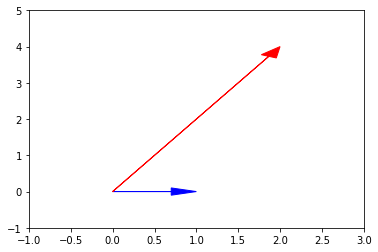

In [39]:
plt.arrow(0,0,1,0,color="blue",head_width=0.2,length_includes_head=True)
plt.arrow(0,0,2,4,color="red",head_width=0.2,length_includes_head=True)
plt.xlim(-1,3)
plt.ylim(-1,5)
plt.show()

Vektörler bariz, aradaki açıyı yine eski usül, skaler çarpımdan hesaplayalım:

In [42]:
v1 = np.array([1,0])
#v2 = np.array([2,4])
v2 = np.dot(A,v1)
v1_boy = np.linalg.norm(v1)
v2_boy = np.linalg.norm(v2)
aci = np.rad2deg(np.arccos(np.dot(v1,v2)/(v1_boy*v2_boy)))
print("Açı:",aci,"derece")

Açı: 63.43494882292201 derece


(isteyince oluyormuş demek ki 8).

(1,1)i (5,9)a götürdüğünde ne kadar çeviriyormuş, ona da bakalım:

In [9]:
v1 = np.array([1,1])
#v2 = np.array([5,9])
v2 = np.dot(A,v1)
v1_boy = np.linalg.norm(v1)
v2_boy = np.linalg.norm(v2)
aci = np.rad2deg(np.arccos(np.dot(v1,v2)/(v1_boy*v2_boy)))
print("Açı:",aci,"derece")

Açı: 45.00000000000001 derece


Buradan şunu görüyoruz: (1,1)'i, (1,0)'dan çok daha az çeviriyor.

Şöyle bir oyun oynayalım o halde: (1,0)'dan başlayalım, *x*-ekseniyle yaptığı açıyı hesaplayalım ($0^o$), sonra operatörü vurduralım, türettiğimiz vektörün *x*-ekseniyle yaptığı açıyı hesaplayalım, sonra bir daha vurduralım, bu şekilde *n* kere tekrar edelim, bakalım nereye varacağız:

In [46]:
n = 10
v1 = np.array([1,0])
v1_boy = np.linalg.norm(v1)
v1_aci = np.rad2deg(np.arctan2(v1[1],v1[0]))
print("Açı:",v1_aci)
for i in range(n):
    v1 = np.dot(A,v1)
    v1_boy = np.linalg.norm(v2)
    v1_aci = np.rad2deg(np.arctan2(v1[1],v1[0]))
    print("Açı:",v1_aci)
    

Açı: 0.0
Açı: 63.43494882292201
Açı: 60.25511870305778
Açı: 60.376251248826186
Açı: 60.37167490861922
Açı: 60.37184784907869
Açı: 60.371841313706504
Açı: 60.371841560676515
Açı: 60.37184155134358
Açı: 60.371841551696264
Açı: 60.371841551682934


ilginç... türetilen vektörler belli bir açıya ($60.372^o$) yakınsıyor. Başka bir başlangıç noktasından (örneğin (1,1)'den) başlayalım:

In [47]:
n = 10
v1 = np.array([1,1])
v1_boy = np.linalg.norm(v1)
v1_aci = np.rad2deg(np.arctan2(v1[1],v1[0]))
print("Açı:",v1_aci)
for i in range(n):
    v1 = np.dot(A,v1)
    v1_boy = np.linalg.norm(v2)
    v1_aci = np.rad2deg(np.arctan2(v1[1],v1[0]))
    print("Açı:",v1_aci)

Açı: 45.0
Açı: 60.94539590092286
Açı: 60.35013649242442
Açı: 60.37266173752195
Açı: 60.371810557014264
Açı: 60.37184272296377
Açı: 60.37184150742105
Açı: 60.371841553356084
Açı: 60.371841551620214
Açı: 60.37184155168581
Açı: 60.37184155168333


!!! 

Aynı yere ulaştık! İyice kafadan uydurup, oradan başlayalım:

In [21]:
n = 10
v1 = np.random.randint(low=0,high=100,size=2)
print(v1)
v1_boy = np.linalg.norm(v1)
v1_aci = np.rad2deg(np.arctan2(v1[1],v1[0]))
print("Açı:",v1_aci)
for i in range(n):
    v1 = np.dot(A,v1)
    v1_boy = np.linalg.norm(v1)
    v1_aci = np.rad2deg(np.arctan2(v1[1],v1[0]))
    print("Açı:",v1_aci)

[14 65]
Açı: 77.84505830277777
Açı: 59.65948299863219
Açı: 60.39871684728899
Açı: 60.37082587573462
Açı: 60.37187993371818
Açı: 60.37184010123624
Açı: 60.371841606495444
Açı: 60.371841549612085
Açı: 60.3718415517617
Açı: 60.37184155168047
Açı: 60.37184155168353


Hepsinde de aynı yere varıyoruz!

Akla çok doğal bir soru geliyor: ilk vektörümüzü doğrudan bu açılı çizginin üzerinde bir vektör versem, onu dönüştürmeye kalktığımda ne elde ederim? Hemen bakalım:

In [72]:
theta = 60.371841551683396
v_x = 1
v_y = v_x*np.tan(np.deg2rad(theta))
v = np.array([v_x,v_y])
print(v)
aci = np.rad2deg(np.arctan2(v[1],v[0]))
print("Açı:",aci)
print("-"*45)
v_ussu = np.dot(A,v)
print(v_ussu)
aci = np.rad2deg(np.arctan2(v_ussu[1],v_ussu[0]))
print("Açı:",aci)

[1.         1.75830574]
Açı: 60.371841551683396
---------------------------------------------
[ 7.27491722 12.7915287 ]
Açı: 60.37184155168343


Bu doğrultuda verdiğimizde vektörümüzün yönü değişmedi, sadece boyu değişti, değişim oranını da hesaplayalım:

In [73]:
boy_degisim_orani = v_ussu/v
print(boy_degisim_orani)

[7.27491722 7.27491722]


$x$ bileşeni de, $y$ bileşeni de 7.275 katına çıkmış. Bu süreci şu şekilde yazabiliriz demek oluyor bu:

$$\vec{p}' = A\cdot\vec{p}= \begin{bmatrix}2&3\\4&5\end{bmatrix}\left( \begin{matrix}1\\1.7583\end{matrix} \right) = \left( \begin{matrix}7.275\\12.792\end{matrix} \right)=7.275\left( \begin{matrix}1\\1.7583\end{matrix} \right)$$

Yani, bu özel yöndeki vektöre, dönüşüm operatörünü vurdurduğumuzda, vektörün yönü değişmeyip, sadece boyu değişiyor. Bir operatör için böyle bir vektör bulursak, o vektöre, o operatörün **özvektörü** (*eigenvector*); boydaki değişim oranına da o operatörün **özdeğeri** (*eigenvalue*) deriz.

**Bariz bilgi:** Eğer $\left( \begin{matrix}x_1\\y_1\end{matrix} \right)$, bir $A$ operatörünün $\lambda$ özdeğerli özvektörü ise, $r\in\mathbb{C}$ olmak üzere, $\left( \begin{matrix}r.x_1\\r.y_1\end{matrix} \right)$ da aynı operatörün aynı özdeğerli özvektörüdür:

$$A\left( \begin{matrix}x_1\\y_1\end{matrix} \right)=\lambda \left( \begin{matrix}x_1\\y_1\end{matrix} \right)\\
A\left( \begin{matrix}r.x_1\\r.y_1\end{matrix} \right)=\lambda \left( \begin{matrix}r.x_1\\r.y_1\end{matrix} \right)$$

**Ödev: $A=\begin{bmatrix}2&3\\4&5\end{bmatrix}$ operatörü için:**
  * $\left( \begin{matrix}-0.49437\\-0.86925\end{matrix} \right)$,
  * $\left( \begin{matrix}-0.79681\\0.60423\end{matrix} \right)$  
  
vektörlerini inceleyin. Bunlar özvektör ise, özdeğerlerini hesaplayıp, yukarıda bulduğumuz $\left( \begin{matrix}1\\1.7583\end{matrix} \right)$ özvektörü ile karşılaştırın.

**Ödev: $90^0$ dönüş operatörünün özvektörünü ve özdeğerini bulun (bulamazsanız da yorumlayın (50 puan); bulursanız da (100 puan!))**

## Özdeğer ve özvektörlerin kısa yoldan bulunması
Özdeğer ve özvektörler başta klasik mekanik ve kuantum mekaniği olmak üzere fizikte çok önemlidirler çünkü her şeyi dönüştüren bir işlemi "ehlileştiren" bir özel durumu işaret ederler. Bu özel durum, karmaşık (dolaşık, iç içe geçmiş) bir denklem sistemini, birbirinden bağımsız denklemler cinsinden ayırıp, ifade etmemizi, tek tek basitçe çözmemizi sağlarlar (ek olarak uygulamaların olduğu bir notu ekleyeceğim). Matris işlemlerini verilen girdiye bağlı parametreleri olan bir dönüş ve boyut değiştiriş olarak düşünürsek, aslında yaptığımız iş yukarıda da anlatmaya çalıştığımız üzere, bu işlemden yönel olarak etkilenmeyen özel vektörler (yönler) bulmaktan ibaret.

Gerek fizikte, gerekse matematikte özdeğer ve özvektörlerin bulunması çoğu zaman epey kritik olduğundan, bu işi bizler için yapan fonksiyonların olması da kaçınılmazdır:

In [93]:
A = np.array([[2,3],[4,5]])
print(A)
print()
[ozdegerler,ozvektorler] = np.linalg.eig(A)
print("Özdeğerler: ",ozdegerler,"\n-----\nÖzvektörler:\n",l)

[[2 3]
 [4 5]]

Özdeğerler:  [-0.27491722  7.27491722] 
-----
Özvektörler:
 [[-0.79681209 -0.49436913]
 [ 0.60422718 -0.86925207]]


In [91]:
# Sağlamasını yapalim:
ozv_1 = ozvektorler[:,0]
print(ozv_1)
s_1 = -np.dot(A,ozv_1)
print(s_1)
l_1 = np.linalg.norm(s_1)
print(l_1)
print(s_1/l_1)

print("-"*45)

ozv_2 = ozvektorler[:,1]
print(ozv_2)
s_2 = -np.dot(A,ozv_2)
print(s_2)
l_2 = np.linalg.norm(s_2)
print(l_2)
print(s_2/l_2)

[-0.79681209  0.60422718]
[-0.21905736  0.16611246]
0.27491721763537486
[-0.79681209  0.60422718]
---------------------------------------------
[-0.49436913 -0.86925207]
[3.59649447 6.32373687]
7.274917217635375
[0.49436913 0.86925207]


# Tavsiyeler:
* [3Blue1Brown, "Linear transformations and matrices"](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3)
* [Zach Star, "The Applications of Matrices | What I wish my teachers told me way earlier"](https://www.youtube.com/watch?v=rowWM-MijXU)
* [Zach Star, "The applications of eigenvectors and eigenvalues | That thing you heard in Endgame has other uses"](https://www.youtube.com/watch?v=i8FukKfMKCI)